In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud


In [5]:
df = pd.read_csv("student_feedback.csv")
df.head()

,Event_Name,Event_Type,Department,Rating,Feedback
0,AI Seminar,Seminar,IT,4,Great event and well organized
1,Robotics Workshop,Workshop,Mechanical,3,Could be better
2,Business Talk,Seminar,Management,2,Expected more content
3,Business Talk,Seminar,Management,4,Highly engaging and useful
4,Business Talk,Seminar,Management,4,Great event and well organized


In [6]:
df.isnull().sum()

,0
Event_Name,0
Event_Type,0
Department,0
Rating,0
Feedback,0


In [8]:
df['Rating'] = pd.to_numeric(df['Rating'])


⭐ Average Rating per Event

In [9]:
df.groupby('Event_Name')['Rating'].mean().sort_values(ascending=False)

,Rating
Event_Name,
Robotics Workshop,3.214286
AI Seminar,3.038095
Business Talk,2.937500
Tech Fest,2.769231
Cultural Night,2.641975


📊 Bar Chart


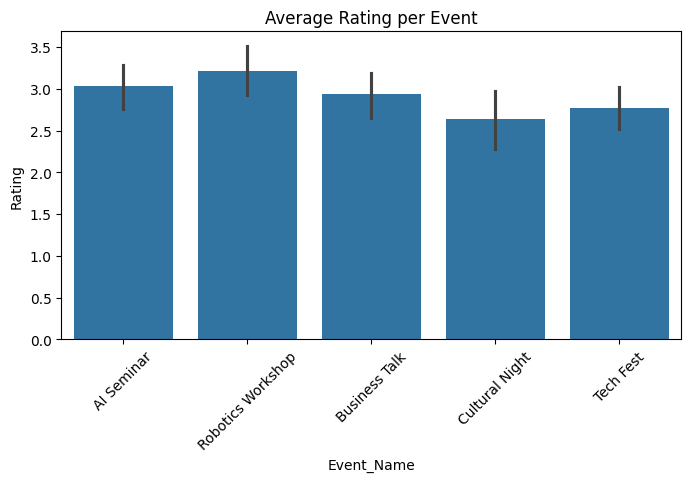

In [11]:
plt.figure(figsize=(8,4))
sns.barplot(x='Event_Name', y='Rating', data=df)
plt.xticks(rotation=45)
plt.title("Average Rating per Event")
plt.show()

Sentiment Analysis (Text)

In [12]:
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

In [18]:
import numpy as np

df['Date'] = pd.date_range(start="2023-01-01", periods=len(df), freq='D')
df.head()
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Feedback'].apply(get_sentiment)
df['Month'] = df['Date'].dt.to_period('M').astype(str)
monthly_sentiment = (
    df.groupby(['Month', 'Sentiment'])
    .size()
    .reset_index(name='Count')
)

monthly_sentiment.head()
df.head()

,Event_Name,Event_Type,Department,Rating,Feedback,Sentiment,Date,Month
0,AI Seminar,Seminar,IT,4,Great event and well organized,Positive,2023-01-01,2023-01
1,Robotics Workshop,Workshop,Mechanical,3,Could be better,Positive,2023-01-02,2023-01
2,Business Talk,Seminar,Management,2,Expected more content,Positive,2023-01-03,2023-01
3,Business Talk,Seminar,Management,4,Highly engaging and useful,Positive,2023-01-04,2023-01
4,Business Talk,Seminar,Management,4,Great event and well organized,Positive,2023-01-05,2023-01


#Plot Monthly Sentiment Trend

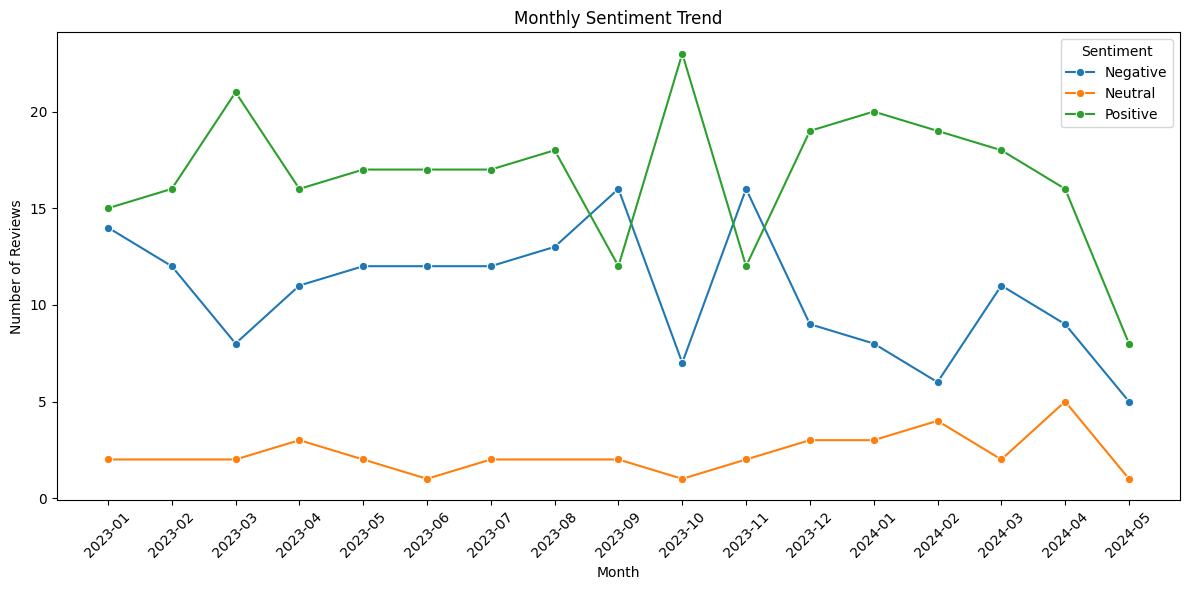

In [19]:
plt.figure(figsize=(12,6))

sns.lineplot(
    data=monthly_sentiment,
    x='Month',
    y='Count',
    hue='Sentiment',
    marker='o'
)

plt.xticks(rotation=45)
plt.title("Monthly Sentiment Trend")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()

In [20]:
df['Sentiment'] = df['Feedback'].apply(get_sentiment)
df.head()

,Event_Name,Event_Type,Department,Rating,Feedback,Sentiment,Date,Month
0,AI Seminar,Seminar,IT,4,Great event and well organized,Positive,2023-01-01,2023-01
1,Robotics Workshop,Workshop,Mechanical,3,Could be better,Positive,2023-01-02,2023-01
2,Business Talk,Seminar,Management,2,Expected more content,Positive,2023-01-03,2023-01
3,Business Talk,Seminar,Management,4,Highly engaging and useful,Positive,2023-01-04,2023-01
4,Business Talk,Seminar,Management,4,Great event and well organized,Positive,2023-01-05,2023-01


Sentiment Distribution

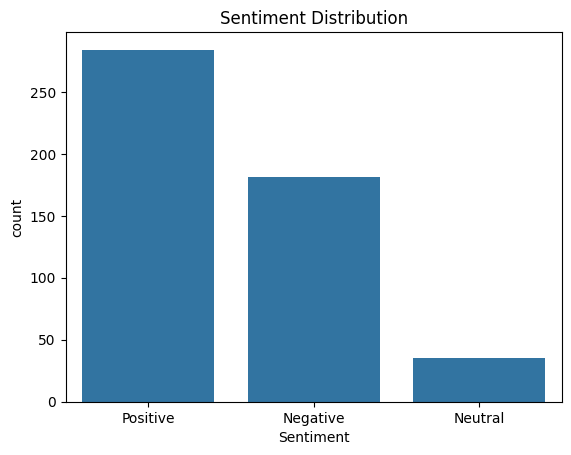

In [14]:
sns.countplot(x='Sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

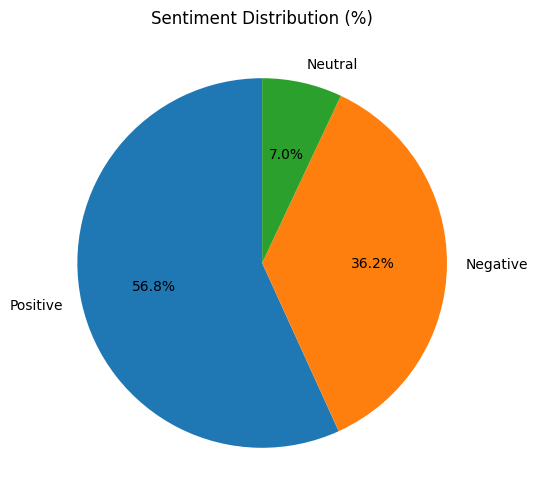

In [21]:
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Sentiment Distribution (%)")
plt.show()

Event Type vs Rating


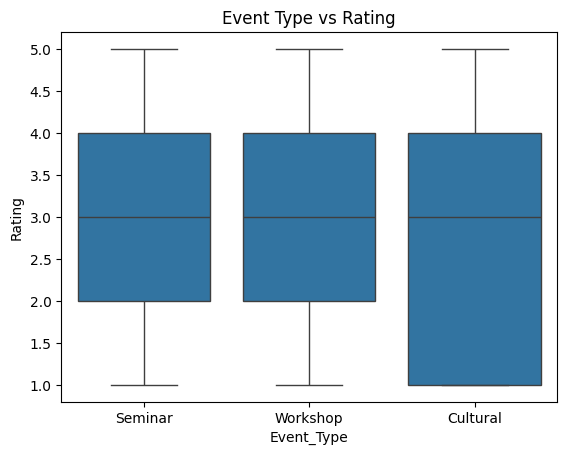

In [15]:
sns.boxplot(x='Event_Type', y='Rating', data=df)
plt.title("Event Type vs Rating")
plt.show()

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

/tmp/ipython-input-2176949949.py:63: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2176949949.py:63: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2176949949.py:63: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2176949949.py:63: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pyla

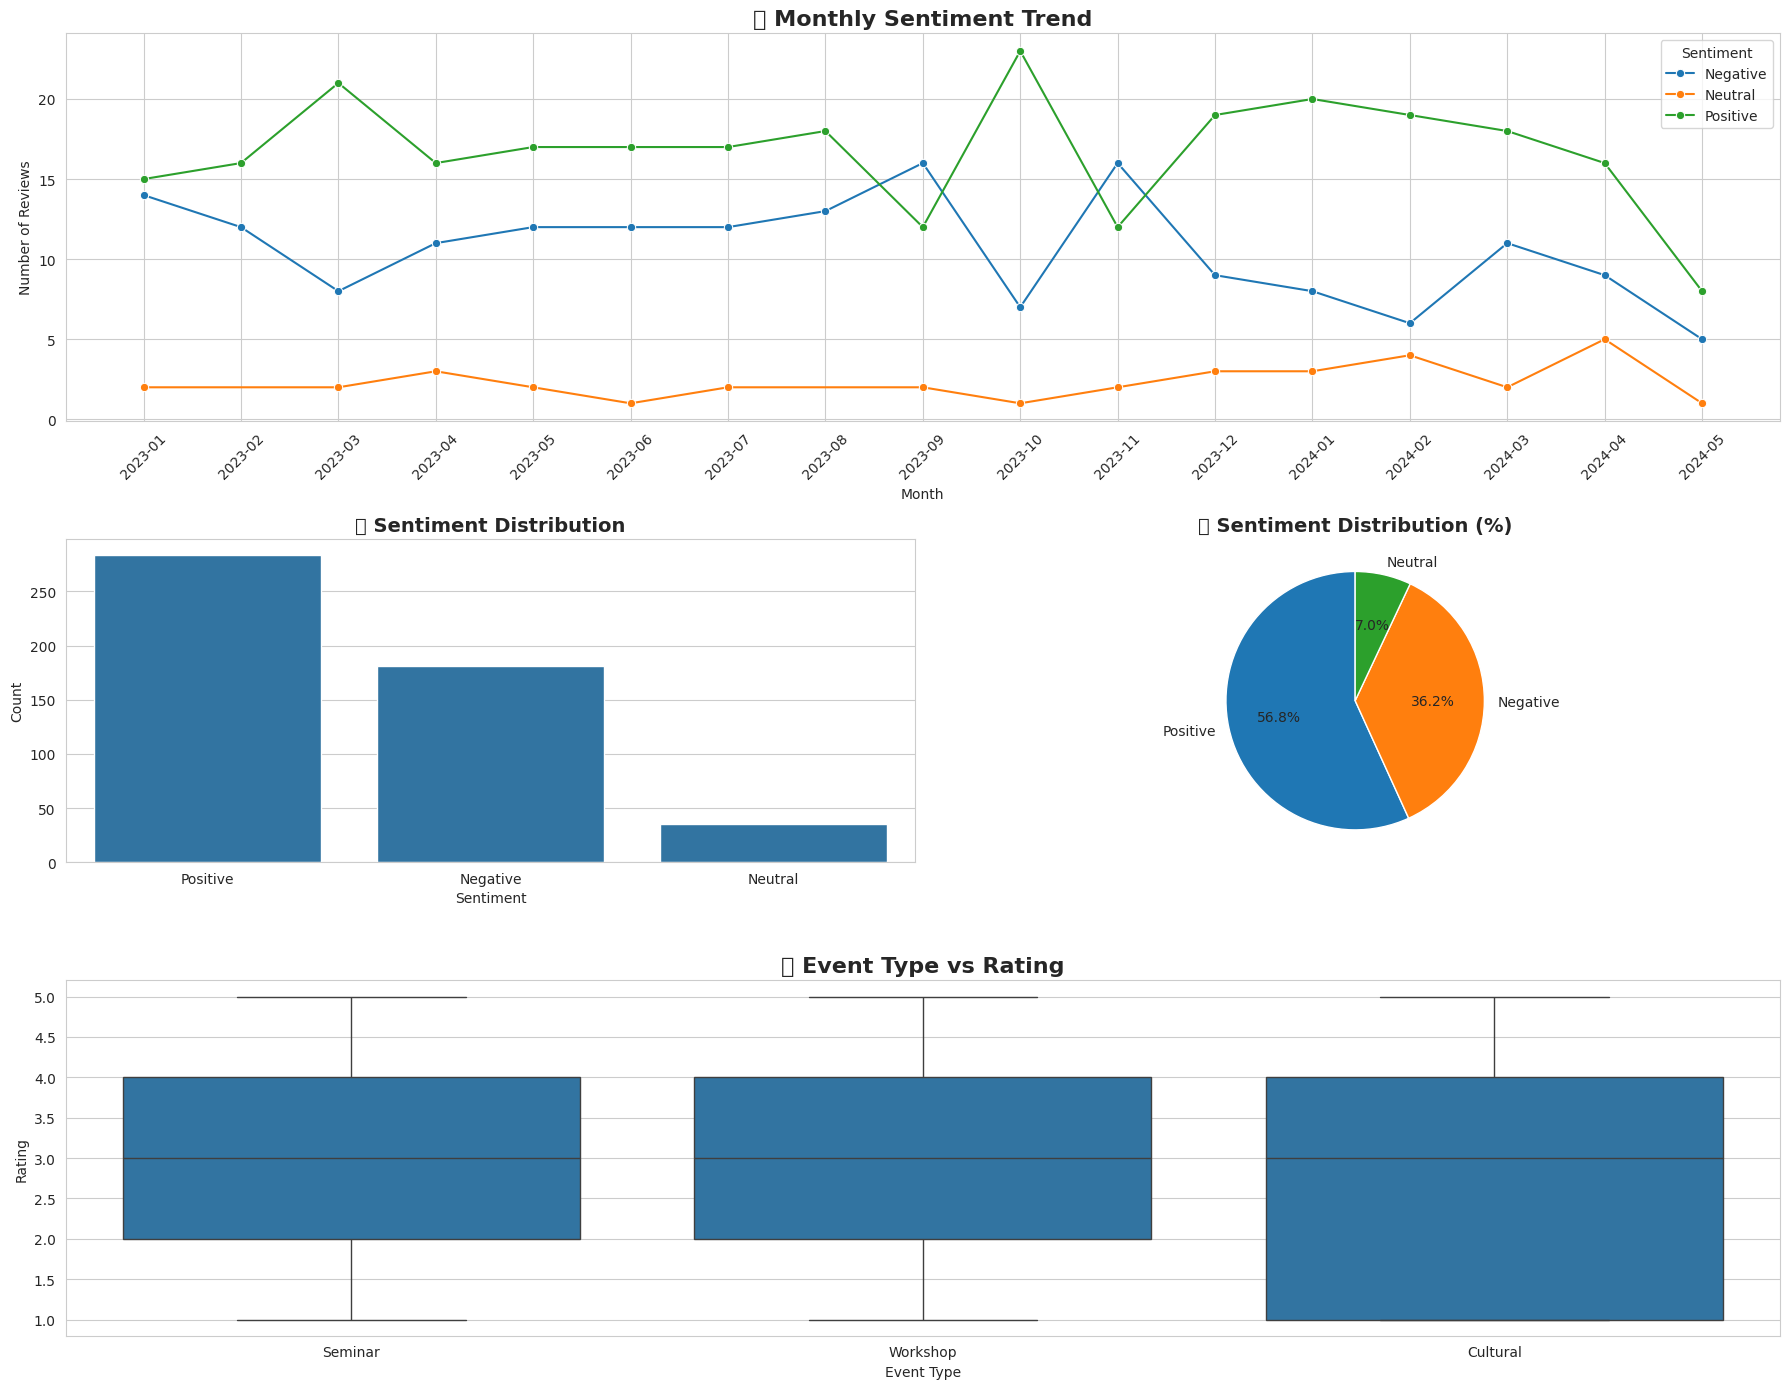

In [23]:
fig = plt.figure(figsize=(18, 14))
grid = fig.add_gridspec(3, 2, height_ratios=[1.2, 1, 1.1])

# -------------------- 1️⃣ Monthly Sentiment Trend --------------------
ax1 = fig.add_subplot(grid[0, :])

sns.lineplot(
    data=monthly_sentiment,
    x='Month',
    y='Count',
    hue='Sentiment',
    marker='o',
    ax=ax1
)

ax1.set_title("📈 Monthly Sentiment Trend", fontsize=16, fontweight='bold')
ax1.set_xlabel("Month")
ax1.set_ylabel("Number of Reviews")
ax1.tick_params(axis='x', rotation=45)

# -------------------- 2️⃣ Sentiment Distribution (Bar) --------------------
ax2 = fig.add_subplot(grid[1, 0])

sns.countplot(
    x='Sentiment',
    data=df,
    ax=ax2
)

ax2.set_title("📊 Sentiment Distribution", fontsize=14, fontweight='bold')
ax2.set_xlabel("Sentiment")
ax2.set_ylabel("Count")

# -------------------- 3️⃣ Sentiment Distribution (%) Pie --------------------
ax3 = fig.add_subplot(grid[1, 1])

sentiment_counts = df['Sentiment'].value_counts()

ax3.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)

ax3.set_title("🧠 Sentiment Distribution (%)", fontsize=14, fontweight='bold')

# -------------------- 4️⃣ Event Type vs Rating --------------------
ax4 = fig.add_subplot(grid[2, :])

sns.boxplot(
    x='Event_Type',
    y='Rating',
    data=df,
    ax=ax4
)

ax4.set_title("🎯 Event Type vs Rating", fontsize=16, fontweight='bold')
ax4.set_xlabel("Event Type")
ax4.set_ylabel("Rating")

plt.tight_layout()
plt.show()

#word cloud

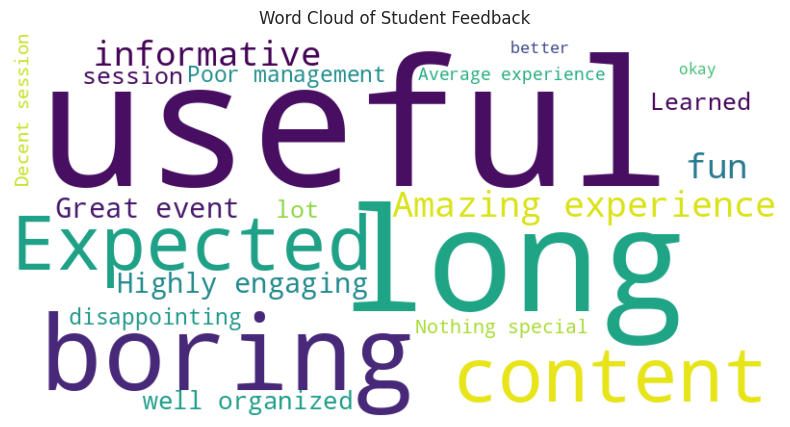

In [29]:
all_text = " ".join(df['Feedback'])
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Student Feedback")
plt.show()

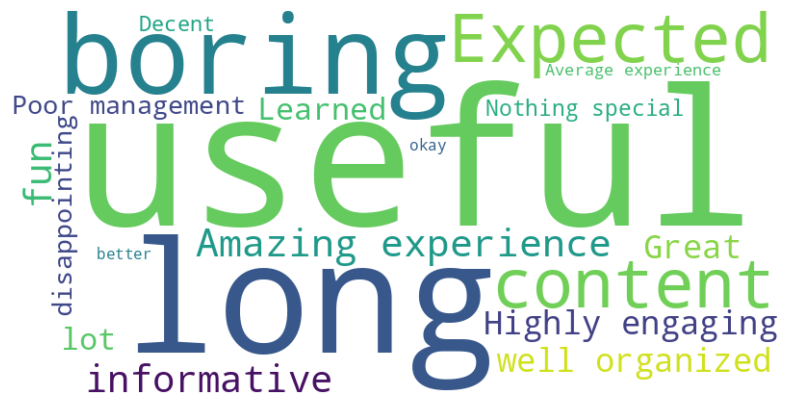

In [30]:
from wordcloud import STOPWORDS

custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["event", "session", "very", "really"])

wordcloud = WordCloud(
    stopwords=custom_stopwords,
    background_color='white',
    width=800,
    height=400
).generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

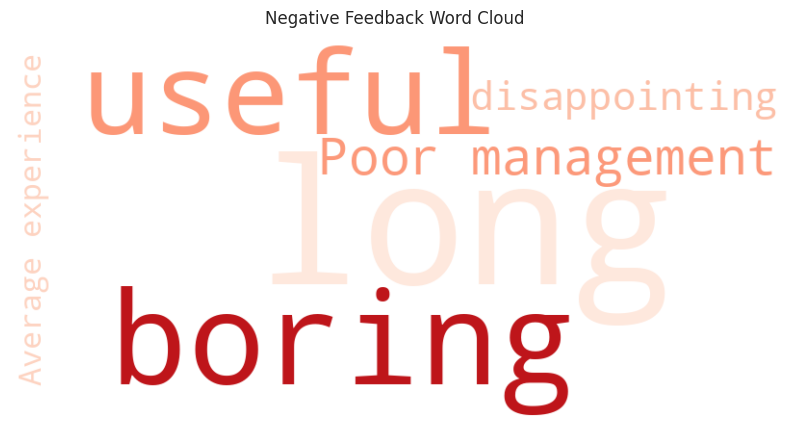

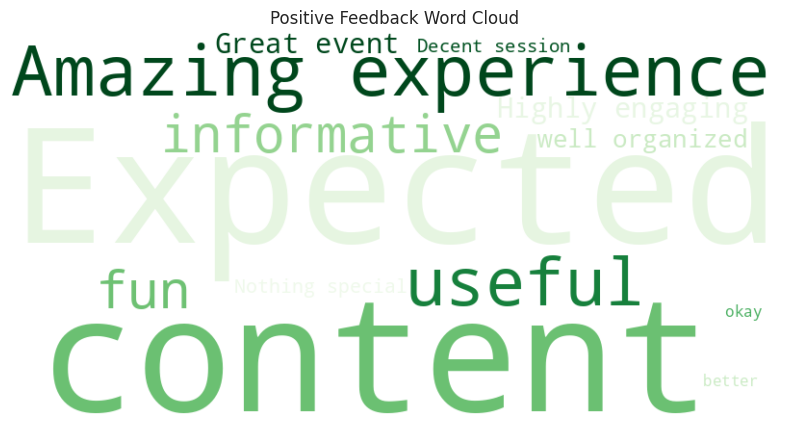

In [31]:
negative_text = " ".join(
    df[df['Sentiment'] == 'Negative']['Feedback']
)

wordcloud_neg = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Reds'
).generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Feedback Word Cloud")
plt.show()
positive_text = " ".join(
    df[df['Sentiment'] == 'Positive']['Feedback']
)

wordcloud_pos = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Greens'
).generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Feedback Word Cloud")
plt.show()

#Key Insights

- Workshops received highest average ratings

- Long-duration seminars had more negative feedback

- Cultural events had high engagement but mixed reviews

#📌 Recommendations

- Reduce seminar duration

- Add interactive sessions

- Improve event scheduling and management